In [1]:
%load_ext autoreload
# %reload_ext autoreload
%autoreload 2


In [2]:
from vicon.dereplication.derep import run_vsearch
from vicon.alignment.ref_align import run_viralmsa
from vicon.processing.sample_processing import process_all_samples
from vicon.visualization.plots import plot_non_gap_counts
from vicon.processing.coverage_analysis import abundant_kmers, crop_df, build_coverage_table, top_kmers_df, find_most_frequent_and_calculate_mismatches, get_i_th_kmers, select_best_kmers, count_seq_coverage, find_best_pair_kmer
from vicon.io.fasta import read_fasta_to_dataframe
from vicon.processing.sample_processing import pipeline_results_cleaner
from vicon.utils.helpers import count_non_gap_characters_from_dataframe, combine_fasta_files, process_fasta_file
from vicon.visualization.plots import plot_rel_cons
from vicon.io.fasta import create_folders_and_save_sequences, read_fasta, remove_first_record, read_fasta_to_dataframe
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import shutil

In [3]:

import os

# Get the base path from the environment variable
base_path = os.getenv("PROJECTS_PATH")
base_path = f"{base_path}vicon/"
print(base_path)


/fast/AG_Ohler/ekarimi/projects/vicon/


In [4]:
from Bio import SeqIO

# Read and write fasta with uppercase sequences
input_file = f"{base_path}data/adenoV/full_samples+7/full.fasta"
output_file = f"{base_path}data/adenoV/full_samples+7/full_upper.fasta"

process_fasta_file(input_file, output_file)


# Read and write fasta with uppercase sequences
input_file = f"{base_path}data/adenoV/250407_Adeno_manfred/AdenovirusF_iRefSeq.fasta"
output_file = f"{base_path}data/adenoV/250407_Adeno_manfred/AdenovirusF_iRefSeq_upper.fasta"

process_fasta_file(input_file, output_file)

In [7]:


VIRUS = "adenoV_full_new_ref_7"
INPUT_SAMPLE = f"{base_path}data/adenoV/full_samples+7/full_upper.fasta"
INPUT_REFERENCE = f"{base_path}data/adenoV/250407_Adeno_manfred/AdenovirusF_iRefSeq_upper.fasta"

VIRALMSA_PATH = os.path.join(f"{base_path}scripts/ViralMSA.py")
OUTPUT_DIR = os.path.join(f"{base_path}results", VIRUS)

# Parameters for Tools
EMAIL = "email@address.com"
KMER_SIZE = 250
THRESHOLD = 240
L_GENE_START = -1
L_GENE_END = 35000

SAMPLE_DIR = os.path.dirname(INPUT_SAMPLE)
REFERENCE_DIR = os.path.dirname(INPUT_REFERENCE)

LOG_DIR = os.path.join(OUTPUT_DIR, "logs")
MAIN_DF_PATH = os.path.join(OUTPUT_DIR, "aggregated_results.csv")
KMER1_PATH = os.path.join(OUTPUT_DIR, "kmer1.csv")
KMER2_PATH = os.path.join(OUTPUT_DIR, "kmer2.csv")

# File Names
SAMPLE_NAME = os.path.basename(INPUT_SAMPLE)
REFERENCE_NAME = os.path.basename(INPUT_REFERENCE)

# Paths
DEREP_FASTA = os.path.join(SAMPLE_DIR, "derep.fasta")
CLUSTERS_UC = os.path.join(SAMPLE_DIR, "clusters.uc")
ALIGNED_DIR = os.path.join(SAMPLE_DIR, "aligned")
if os.path.exists(ALIGNED_DIR):
    shutil.rmtree(ALIGNED_DIR)
DEREP_FASTA_ALN = os.path.join(ALIGNED_DIR, "derep.fasta.aln")



# Example Usage of Paths and Functions
run_vsearch(INPUT_SAMPLE, DEREP_FASTA, CLUSTERS_UC)
run_viralmsa(
    email=EMAIL, 
    sample_fasta=DEREP_FASTA, 
    output_dir=ALIGNED_DIR, 
    reference_fasta=INPUT_REFERENCE, 
    script_path=VIRALMSA_PATH
)

remove_first_record(DEREP_FASTA_ALN, DEREP_FASTA_ALN)

# Process all samples and aggregate results
df, mask = process_all_samples(INPUT_REFERENCE, DEREP_FASTA_ALN, LOG_DIR, window_size=KMER_SIZE, threshold=THRESHOLD, only_valid_kmers=True)
df3, mask3 = process_all_samples(INPUT_REFERENCE, DEREP_FASTA_ALN, LOG_DIR, window_size=KMER_SIZE, threshold=KMER_SIZE-3, only_valid_kmers=True)

# Save aggregated results
# df.to_csv(MAIN_DF_PATH)
# print("Aggregated results saved.")

# df = pd.read_csv(MAIN_DF_PATH, index_col="SampleID")
df


vsearch v2.29.1_linux_x86_64, 1007.7GB RAM, 112 cores
https://github.com/torognes/vsearch

Dereplicating file /fast/AG_Ohler/ekarimi/projects/vicon/data/adenoV/full_samples+7/full_upper.fasta 100%
5529201 nt in 162 seqs, min 33451, max 34237, avg 34131
Sorting 100%
154 unique sequences, avg cluster 1.1, median 1, max 3
Writing FASTA output file 100%
Writing uc file, first part 100%
Writing uc file, second part 100%
The first record has been removed. Updated FASTA saved to: /fast/AG_Ohler/ekarimi/projects/vicon/data/adenoV/full_samples+7/aligned/derep.fasta.aln


,0,1,2,3,4,5,6,7,8,9,...,33978,33979,33980,33981,33982,33983,33984,33985,33986,33987
SampleID,,,,,,,,,,,,,,,,,,,,,
MW567964.1_LOCUS_______MW567964_______________34102_bp____DNA_____linear___VRL_08_MAR_2021;size=3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
L19443.1_LOCUS_______L19443_________________34214_bp____DNA_____linear___VRL_27_APR_2012;size=2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ON442312.1_LOCUS_______ON442312_______________34181_bp____DNA_____linear___VRL_25_MAY_2022;size=2,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
ON442319.1_LOCUS_______ON442319_______________34198_bp____DNA_____linear___VRL_25_MAY_2022;size=2,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
OP174919.1_LOCUS_______OP174919_______________34179_bp____DNA_____linear___VRL_23_MAY_2023;size=2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OR628212.1_LOCUS_______OR628212_______________33877_bp____DNA_____linear___VRL_05_NOV_2023;size=1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OR628213.1_LOCUS_______OR628213_______________34069_bp____DNA_____linear___VRL_09_AUG_2024;size=1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OR628214.1_LOCUS_______OR628214_______________34121_bp____DNA_____linear___VRL_05_NOV_2023;size=1,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


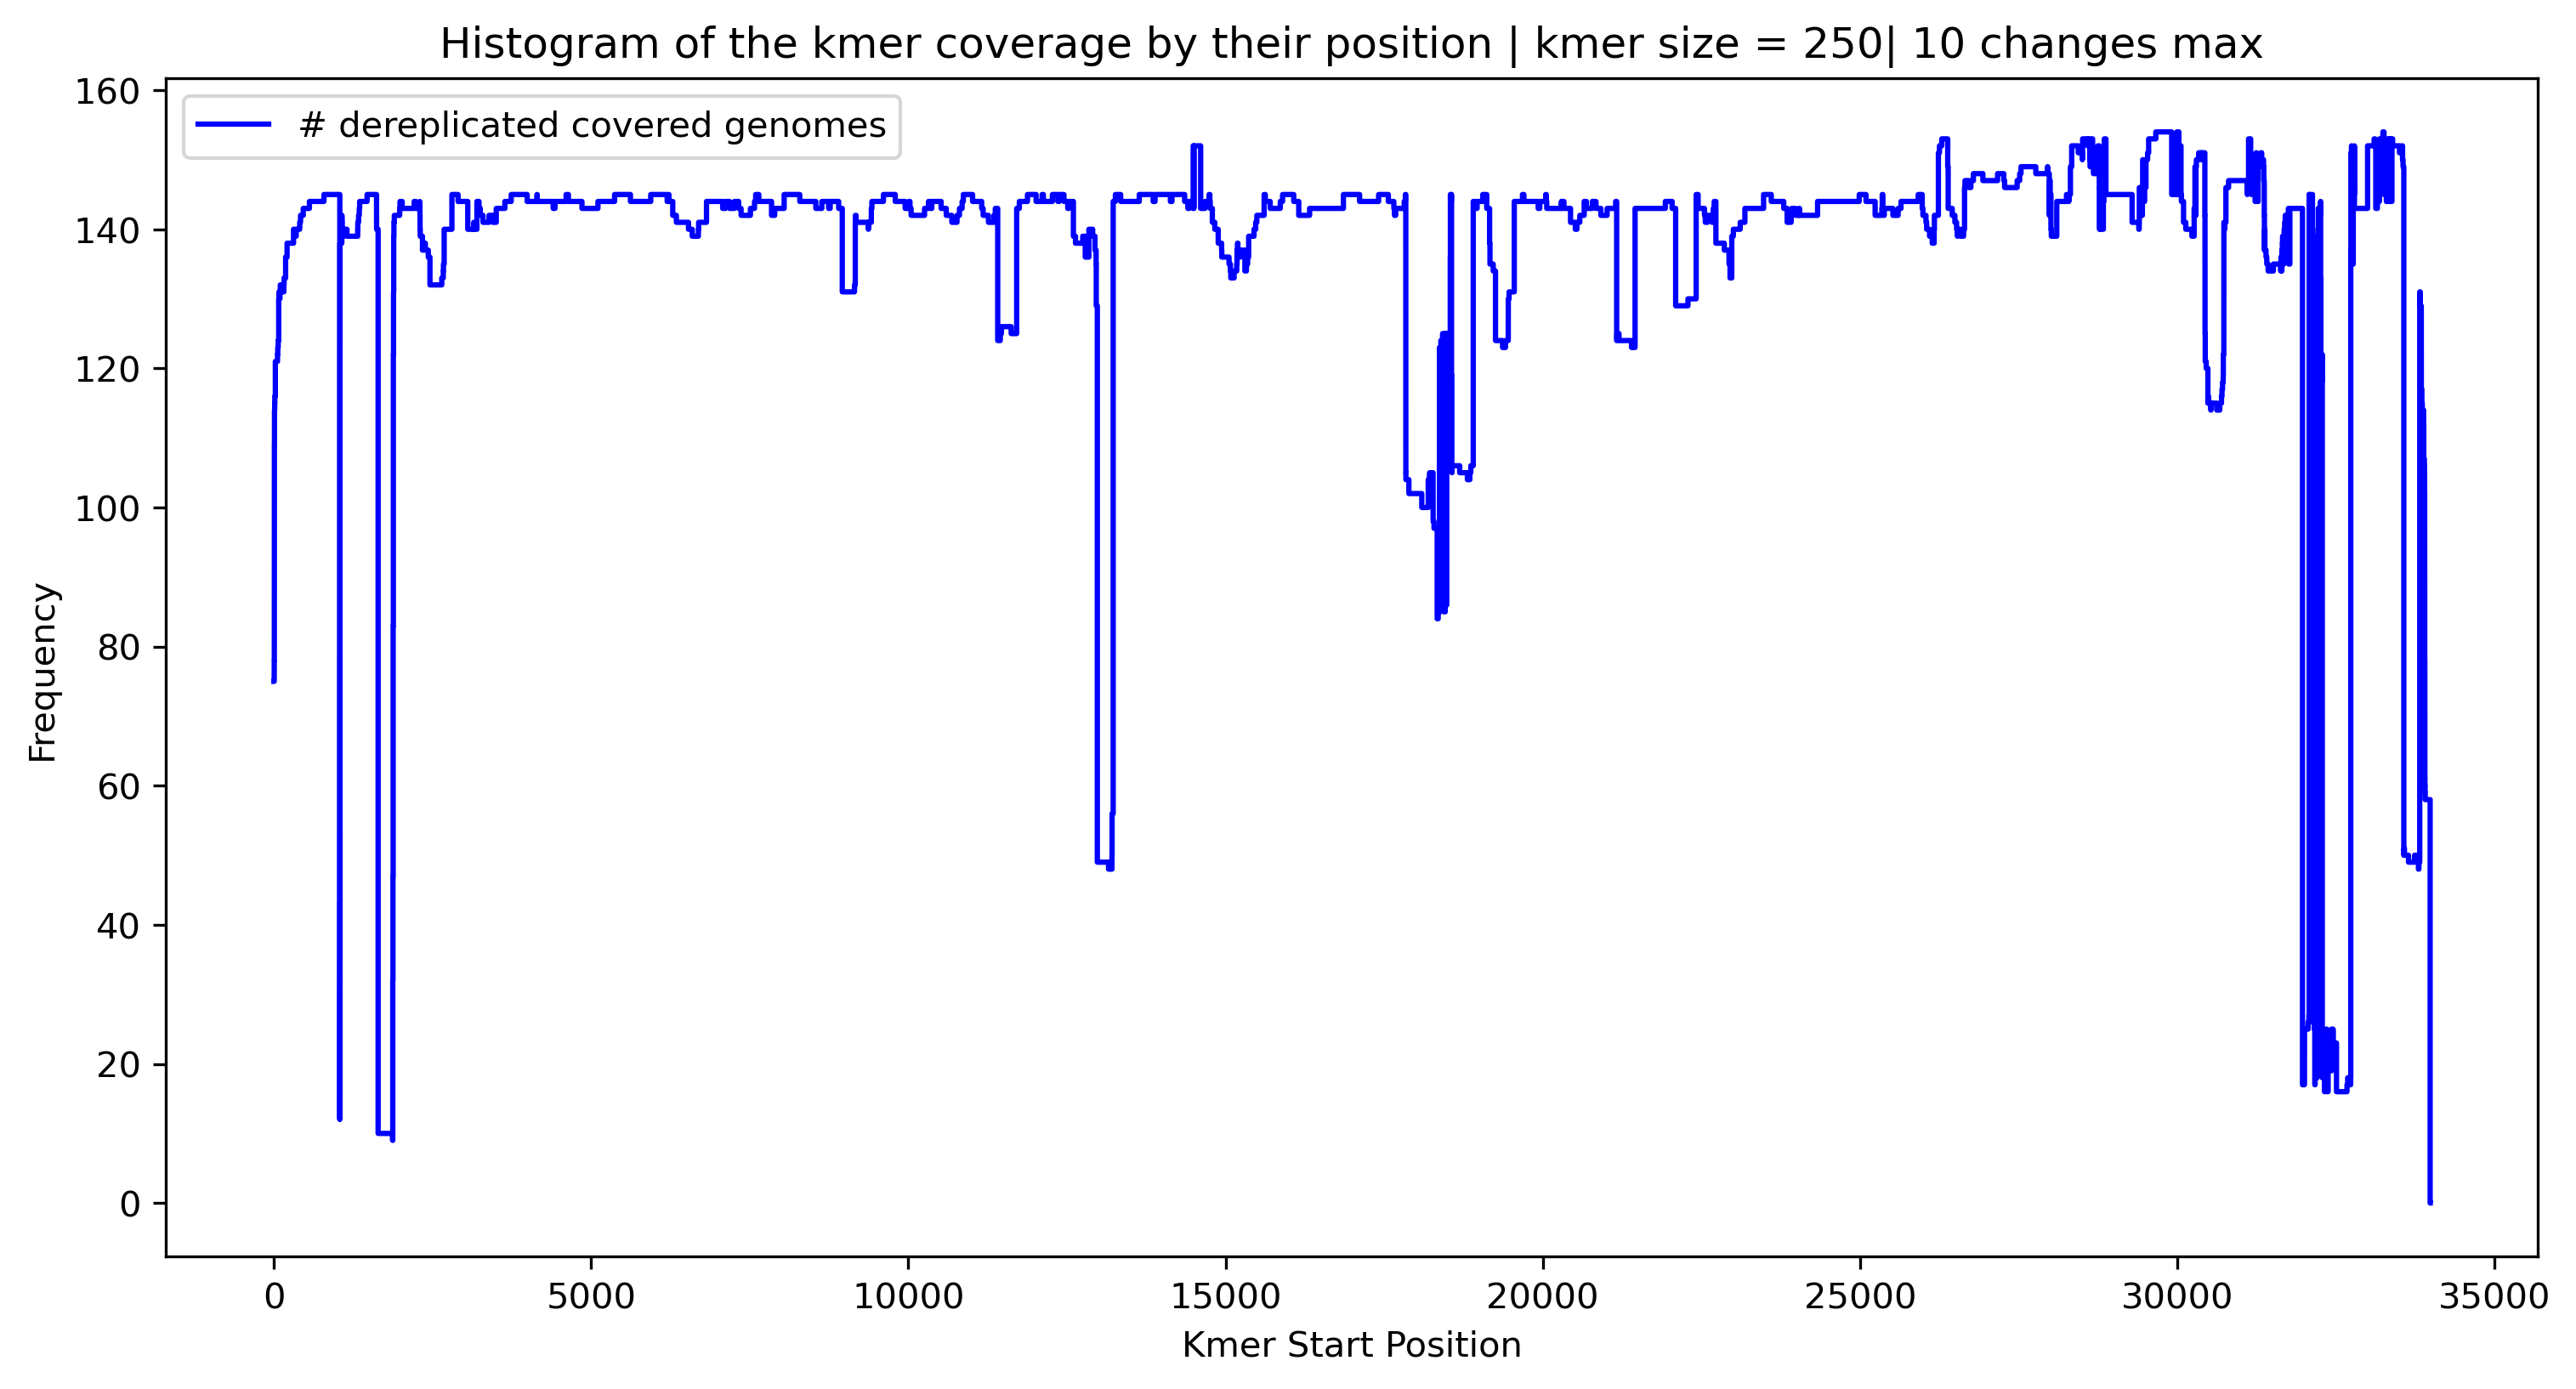

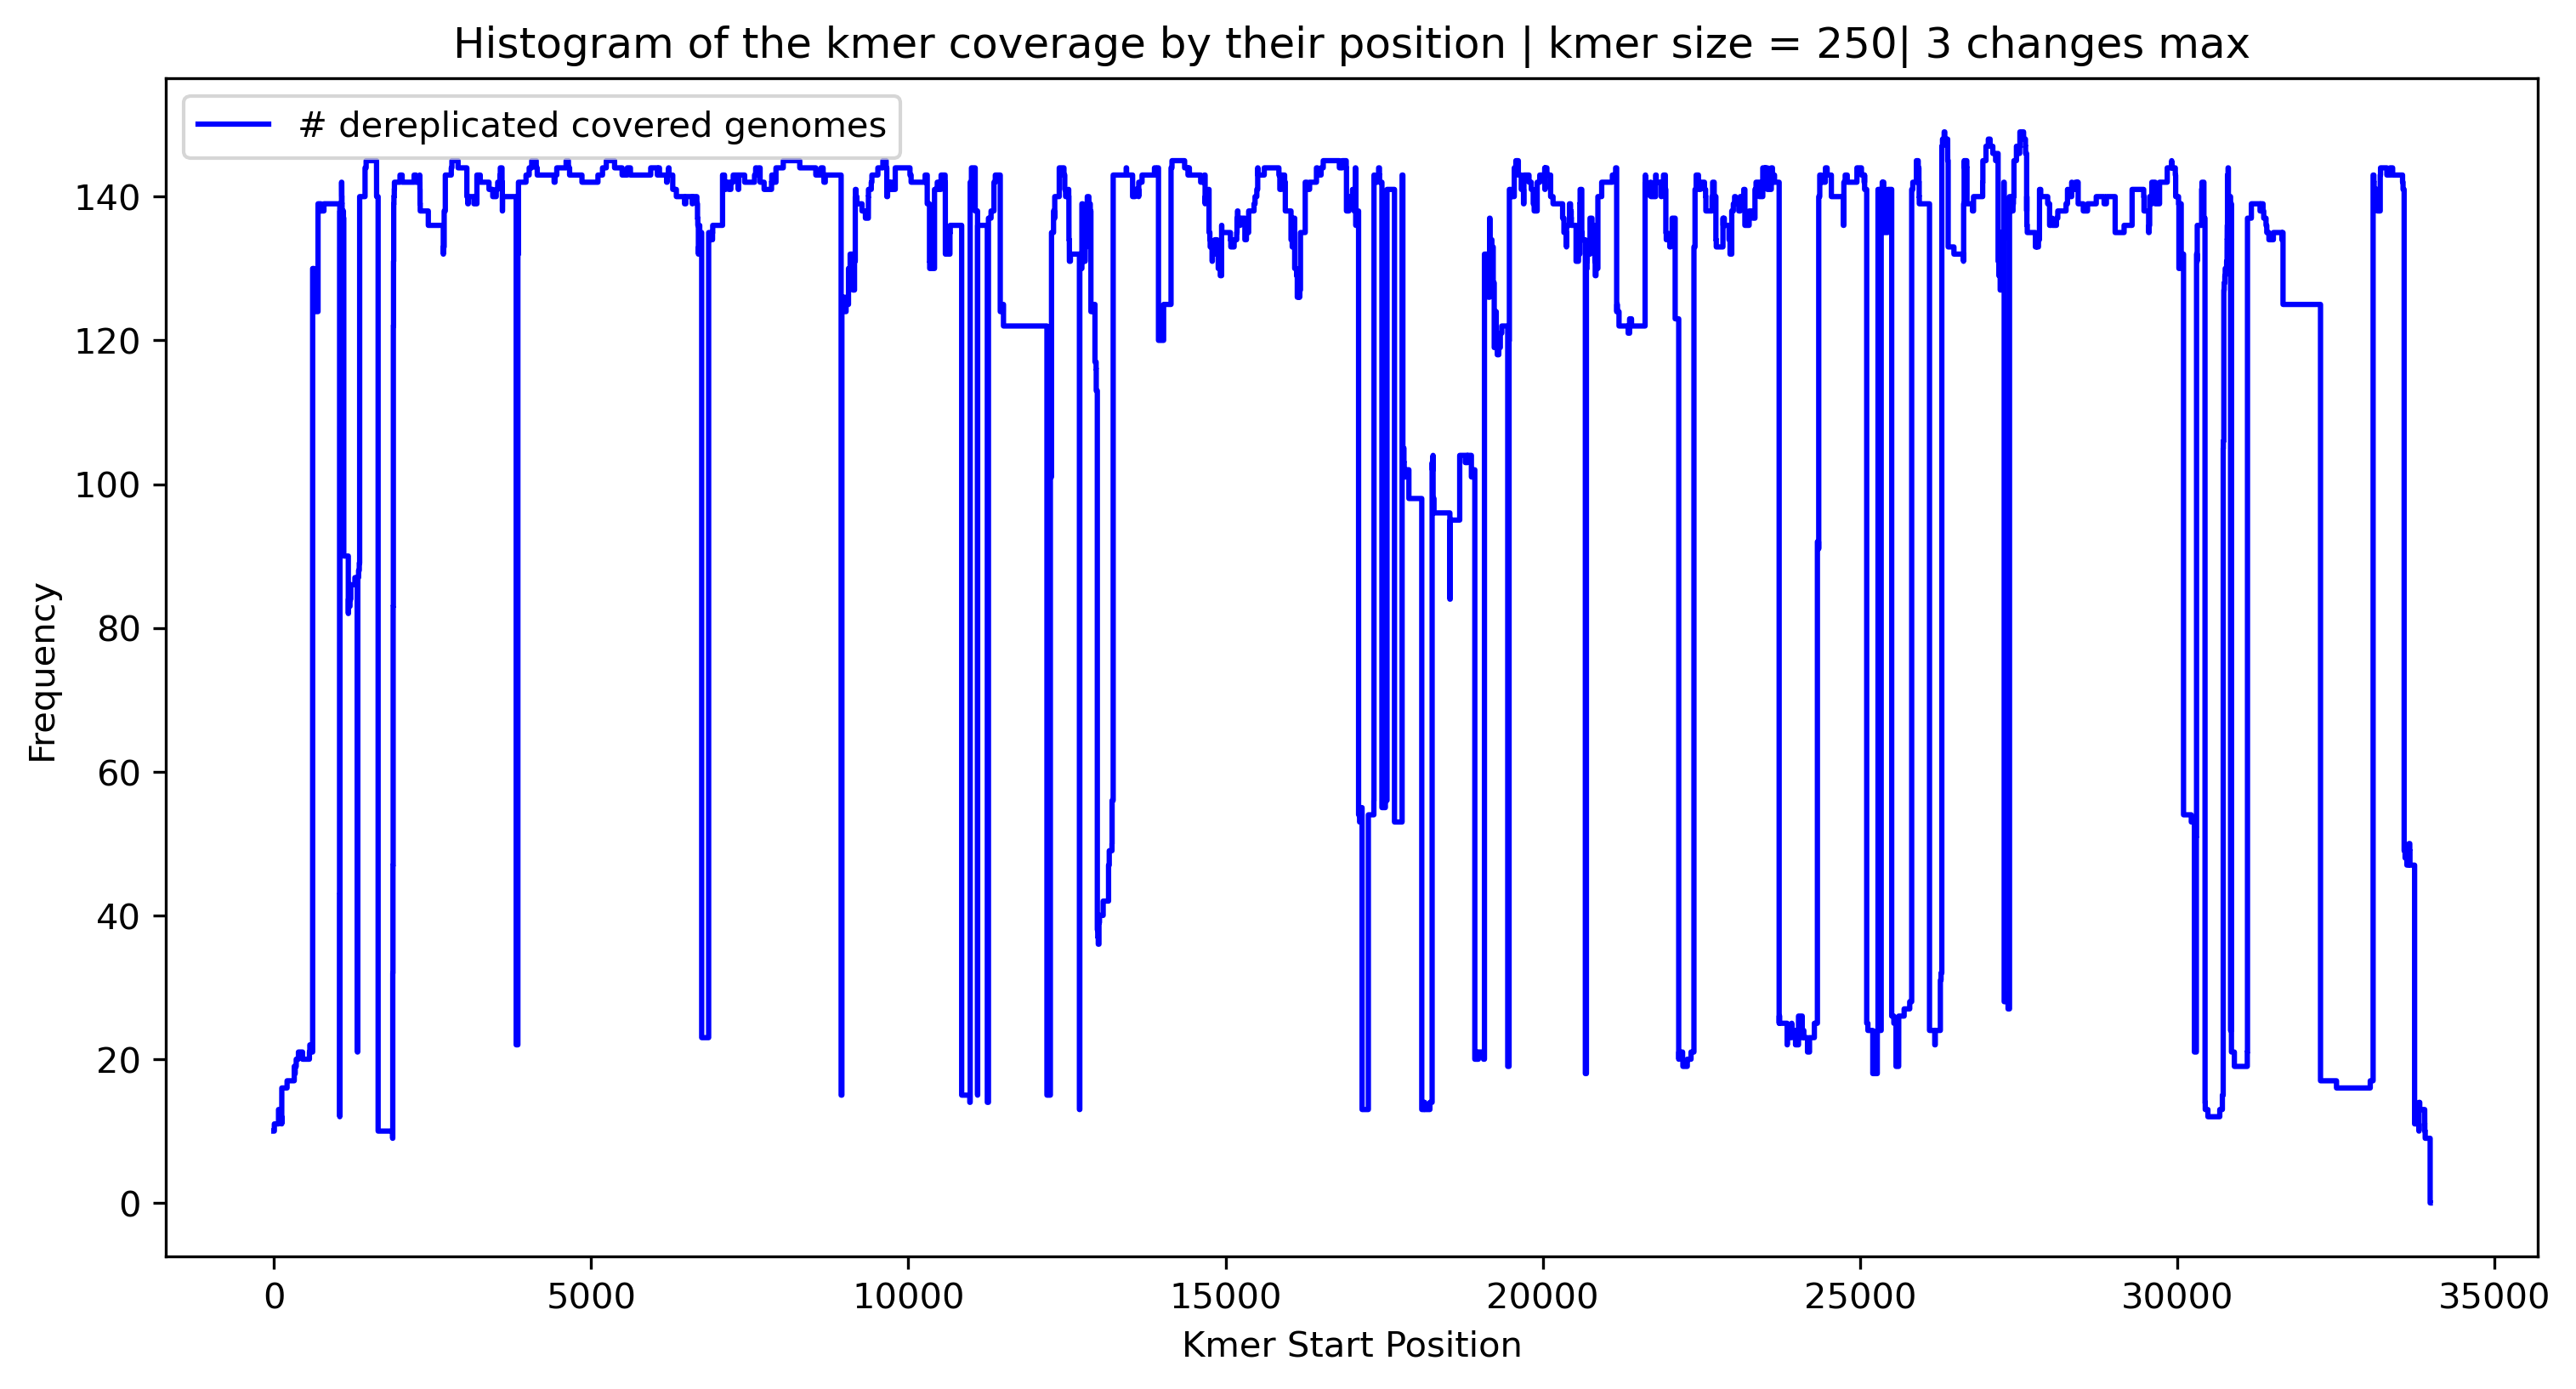

In [9]:
df.columns = df.columns.astype(int)
plot_rel_cons(df,kmer_size=KMER_SIZE, threshold=KMER_SIZE-THRESHOLD)
plot_rel_cons(df3, kmer_size=KMER_SIZE, threshold=3)


In [10]:
df.sum().sum()

np.int64(4571389)

In [ ]:
# This should be defined based on the plots you get
COVERAGE_RATIO = 140/ df3.shape[0]

# Crop DataFrame to L gene region and apply coverage threshold
# ldf = crop_df(df, L_GENE_START, L_GENE_END, coverage_ratio=COVERAGE_RATIO)
# kmer1, kmer2 = find_best_pair_kmer(ldf, DEREP_FASTA_ALN, mask, window_size=150)
ldf = crop_df(df3, L_GENE_START, L_GENE_END, coverage_ratio=COVERAGE_RATIO)
kmer1, kmer2 = find_best_pair_kmer(ldf, DEREP_FASTA_ALN, mask3, window_size=KMER_SIZE)

Limiting DataFrame to gene region from position -1 to 35000
Minimum coverage threshold set to 140 based on coverage ratio 0.9090909090909091
DataFrame cropped to 14017 columns with coverage above threshold.


In [10]:
df_ref = read_fasta_to_dataframe(INPUT_REFERENCE)
ref_seq = df_ref['Sequence'].values[0]

# Extract kmer sequences
kmer1_seq = ref_seq[kmer1:kmer1+KMER_SIZE]
kmer2_seq = ref_seq[kmer2:kmer2+KMER_SIZE]

print(f"Kmer1 sequence (position {kmer1}):\n{kmer1_seq}")
print(f"Kmer2 sequence (position {kmer2}):\n{kmer2_seq}")




df_kmers1, df_kmers2, df_samples = pipeline_results_cleaner(sample_address=DEREP_FASTA_ALN,
                                                kmer1=kmer1,
                                                kmer2=kmer2,
                                                drop_old_samples=False,
                                                kmer_size= 250,
                                                min_year=2020,
                                                threshold_ratio=0.01,
                                                drop_mischar_samples=True
                                                # drop_mutants=False
                                               )


df_kmers1.to_csv(KMER1_PATH)
df_kmers2.to_csv(KMER2_PATH)


df_counts = count_non_gap_characters_from_dataframe(df_kmers1, sequence_column='alignment') -1
plot_non_gap_counts(df_counts, title=f'{VIRUS}**kmers1 -- Non-Gap Character Counts at Each Position',
                    save = os.path.join(OUTPUT_DIR, "kmers1_mutations.png"))

df_counts = count_non_gap_characters_from_dataframe(df_kmers2, sequence_column='alignment') -1
plot_non_gap_counts(df_counts, title=f'{VIRUS}**kmers2 -- Non-Gap Character Counts at Each Position',
                    save = os.path.join(OUTPUT_DIR, "kmers2_mutations.png"))

Kmer1 sequence (position 30020):
TCCTCCAACGGCTTGCAAGAAAAACCACCGGGAGTCCTCAGCCTGAAATACACTGATCCACTTACAACCAAAAACGGGGCTTTAACCTTAAAACTGGGCACGGGACTAAACATTGATGAAAATGGAGATCTTTCTTCAGATGCTAGCGTGGAAGTTAGCGCCCCTATTACTAAAACCAACAAAATCGTAGGTTTAAATTA
Kmer2 sequence (position 30020):
TCCTCCAACGGCTTGCAAGAAAAACCACCGGGAGTCCTCAGCCTGAAATACACTGATCCACTTACAACCAAAAACGGGGCTTTAACCTTAAAACTGGGCACGGGACTAAACATTGATGAAAATGGAGATCTTTCTTCAGATGCTAGCGTGGAAGTTAGCGCCCCTATTACTAAAACCAACAAAATCGTAGGTTTAAATTA
Read 154 samples from /fast/AG_Ohler/ekarimi/projects/vicon/data/adenoV/full_samples+7/aligned/derep.fasta.aln.
df_samples shape before dropping NaN years: (154, 5)
df_samples shape after dropping NaN years: (154, 5)
df_samples shape after dropping samples with non ATCG chars: (154, 5)
Plot saved as /fast/AG_Ohler/ekarimi/projects/vicon/results/adenoV_full_new_ref_7/kmers1_mutations.png
Plot saved as /fast/AG_Ohler/ekarimi/projects/vicon/results/adenoV_full_new_ref_7/kmers2_mutations.png


In [16]:
df_samples

,ID,Sequence,kmer1,kmer2,year
0,MW567964.1_LOCUS_______MW567964_______________...,----------------------------------------------...,TCCTCCAACGGCTTGCAAGAAAAACCTCCGGGAGTCCTCAGCCTGA...,TCCTCCAACGGCTTGCAAGAAAAACCTCCGGGAGTCCTCAGCCTGA...,2021
1,L19443.1_LOCUS_______L19443_________________34...,CATCATCAATAATATACCTTAAAACTGGAAACGAGCCAATATGATA...,TCCTCCAACGGCTTGCAAGAAAAACCTCCGGGAGTCCTCAGCCTGA...,TCCTCCAACGGCTTGCAAGAAAAACCTCCGGGAGTCCTCAGCCTGA...,2012
2,ON442312.1_LOCUS_______ON442312_______________...,CATCATCAATAATATACCTTAAAGCTGGAAACGAGCCAATATGATA...,TCCTCCAACGGCTTGCAAGAAAAACCTCCGGGAGTCCTCAGCCTGA...,TCCTCCAACGGCTTGCAAGAAAAACCTCCGGGAGTCCTCAGCCTGA...,2022
3,ON442319.1_LOCUS_______ON442319_______________...,CATCATCAATAATATACCTTAAAGCTGGAAACGAGCCAATATGATA...,TCCTCCAACGGCTTGCAAGAAAAACCTCCGGGAGTCCTCAGCCTGA...,TCCTCCAACGGCTTGCAAGAAAAACCTCCGGGAGTCCTCAGCCTGA...,2022
4,OP174919.1_LOCUS_______OP174919_______________...,-------AATAATATACCTTAAAGCTGGAAACGAGCCAATATGATA...,TCCTCCAACGGCTTGCAAGAAAAACCTCCGGGAGTCCTCAGCCTGA...,TCCTCCAACGGCTTGCAAGAAAAACCTCCGGGAGTCCTCAGCCTGA...,2023
...,...,...,...,...,...
149,OR628212.1_LOCUS_______OR628212_______________...,----------------------------------------------...,TCCTCCAGCGGCTTGCAAGAAAAACCTCCGGGAGTCCTCAGCCTGA...,TCCTCCAGCGGCTTGCAAGAAAAACCTCCGGGAGTCCTCAGCCTGA...,2023
150,OR628213.1_LOCUS_______OR628213_______________...,----------------------------------------------...,TCCTCCAACGGCTTGCAAGAAAAACCTCCGGGAGTCCTCAGCCTGA...,TCCTCCAACGGCTTGCAAGAAAAACCTCCGGGAGTCCTCAGCCTGA...,2024
151,OR628214.1_LOCUS_______OR628214_______________...,--------ATAATATACCTTAAAGCTGGAAACGAGCCAATATGATA...,TCCTCCAACGGCTTGCAAGAAAAACCTCCGGGAGTCCTCAGCCTGA...,TCCTCCAACGGCTTGCAAGAAAAACCTCCGGGAGTCCTCAGCCTGA...,2023
152,OR628215.1_LOCUS_______OR628215_______________...,----------------------------------------------...,TCCTCCAACGGCTTGCAAGAAAAACCTCCGGGAGTCCTCAGCCTGA...,TCCTCCAACGGCTTGCAAGAAAAACCTCCGGGAGTCCTCAGCCTGA...,2023


In [17]:
df_samples.groupby(['kmer1']).size()

kmer1
TCCTCCAACGGCTTGCAAGAAAAAACTCCGGGAGTCCTCAGCCTGAAATACACTGATCCACTTACAACCAAAAACGGGGCTTTAACCTTAAAACTGGGCACGGGACTAAACATTGATGAAAATGGAGATCTTTCTTCAGATGCTAGCGTGGAAGTTAGCGCCCCTATTACTAAAACCAACAAAATCGTAGGTTTAAATTA      1
TCCTCCAACGGCTTGCAAGAAAAACCACCGGGAGTCCTCAGCCTGAAATACACTGATCCACTTACAACCAAAAACGGGGCTTTAACCTTAAAACTGGGCACGGGACTAAACATTGATGAAAATGGAGATCTTTCTTCAGATGCTAGCGTGGAAGTTAGCGCCCCTATTACTAAAACCAACAAAATCGTAGGTTTAAATTA     17
TCCTCCAACGGCTTGCAAGAAAAACCTCCGGGAGTCCTCAGCCTGAAATACACTGATCCACTTACAACCAAAAACGGGGCTTTAACCTTAAAACTGGGCACGGGACTAAACATTAATGAAAATGGAGATCTTTCTTCAGATGCTAGCGTGGAAGTTAGCGCCCCTATTACTAAAACCAACAAAATCGTAGGTTTAAATTA      1
TCCTCCAACGGCTTGCAAGAAAAACCTCCGGGAGTCCTCAGCCTGAAATACACTGATCCACTTACAACCAAAAACGGGGCTTTAACCTTAAAACTGGGCACGGGACTAAACATTGATAAAAATGGAGATCTTTCTTCAGATGCTAGCGTGGAAGTTAGCGCCCCTATCACTAAAACCAACAAAATCGTAGGTTTAAATTA      2
TCCTCCAACGGCTTGCAAGAAAAACCTCCGGGAGTCCTCAGCCTGAAATACACTGATCCACTTACAACCAAAAACGGGGCTTTAACCTTAAAACTGGGCACGGGACTAAACATTGATGAAAATGGAGATCTTTCTTCAGATGCCAGCGTGGAAGTTAGCGCC

In [27]:
def select_not_matching_samples_to_top_kmer(df_samples):
    # Step 1: Group by 'kmer1' and get sizes
    group_sizes = df_samples.groupby('kmer1').size()
    
    # Step 2: Get the value of the largest group size
    max_group_size = group_sizes.max()
    
    # Step 3: Get the kmer1 values that are NOT in the largest group
    non_max_kmers = group_sizes[group_sizes != max_group_size].index
    
    # Step 4: Filter original df_samples and get indices
    non_max_indices = df_samples[df_samples['kmer1'].isin(non_max_kmers)].index
    return df_samples.iloc[non_max_indices]


remaining_samples_df = select_not_matching_samples_to_top_kmer(df_samples)

In [28]:
def select_from_largest_group(df_samples):
    # Step 1: Group by 'kmer1' and count
    group_sizes = df_samples.groupby('kmer1').size()

    # Step 2: Identify the most frequent kmer1 value
    most_frequent_kmer = group_sizes.idxmax()

    # Step 3: Filter rows with that kmer1
    largest_group = df_samples[df_samples['kmer1'] == most_frequent_kmer]

    # Step 4: Select one row (e.g., the first one)
    selected_row = largest_group.sample(n=1, random_state=42)  # you can change random_state or use .iloc[0]

    return selected_row


In [30]:
selected = select_from_largest_group(remaining_samples_df)
selected

,ID,Sequence,kmer1,kmer2,year
5,OP555454.1_LOCUS_______OP555454_______________...,--------ATAATATACCTTAAAGCTGGAAACGAGCCAATATGATA...,TCCTCCAACGGCTTGCAAGAAAAACCACCGGGAGTCCTCAGCCTGA...,TCCTCCAACGGCTTGCAAGAAAAACCACCGGGAGTCCTCAGCCTGA...,2023


In [35]:
selected

,ID,Sequence,kmer1,kmer2,year
5,OP555454.1_LOCUS_______OP555454_______________...,--------ATAATATACCTTAAAGCTGGAAACGAGCCAATATGATA...,TCCTCCAACGGCTTGCAAGAAAAACCACCGGGAGTCCTCAGCCTGA...,TCCTCCAACGGCTTGCAAGAAAAACCACCGGGAGTCCTCAGCCTGA...,2023


In [34]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO
import re

def save_as_fasta(df, output_path="output.fasta"):
    records = []
    for _, row in df.iterrows():
        # Replace any non-letter characters with 'N'
        cleaned_seq = re.sub(r'[^A-Za-z]', 'N', row['Sequence'])
        # Create a SeqRecord object
        record = SeqRecord(
            Seq(cleaned_seq),
            id=str(row['ID']),
            description=""  # Optional, can be used for extra metadata
        )
        records.append(record)
    
    # Write to FASTA
    SeqIO.write(records, output_path, "fasta")
    print(f"FASTA file saved to {output_path}")


In [36]:

save_as_fasta(selected, output_path="../../data/adenoV/full_samples+7/ref_for_remaining.fasta")

FASTA file saved to ../../data/adenoV/full_samples+7/ref_for_remaining.fasta


In [37]:
save_as_fasta(remaining_samples_df, output_path="../../data/adenoV/full_samples+7/remaining_samples.fasta")

FASTA file saved to ../../data/adenoV/full_samples+7/remaining_samples.fasta
